**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 05 – Support Vector Machine

Load data and prepare X and y

In [1]:
import numpy as np
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X = X[:, :2]
idx = np.argwhere(y == 2)
X = np.delete(X, idx, axis=0)
y = np.delete(y, idx)
print(X.shape, y.shape)

(100, 2) (100,)


**Task 1:** Use scikit-learn to train your model using SVC with linear kernel. Report the training accuracy. [10 points]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svc = svm.SVC(kernel = 'linear', C = 1).fit(x_train, y_train)

score = svc.score(x_test, y_test)
print(score)

1.0


**Task 2:** Use matplotlib to visualize the data. Use the first feature as x-axis and the second feature as y-axis and assign different colors for data with different labels. Also plot your model decision boundary and use different colors to highlight support vectors. [10 points]

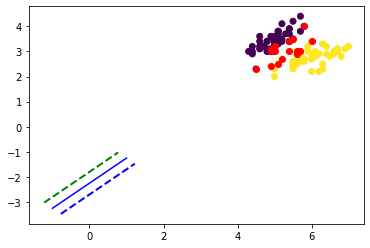

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(X[:, 0], X[:, 1], c = y)

# Constructing a hyperplane using a formula
w = svc.coef_[0] # w consists of 2 elements
b = svc.intercept_[0] # b consist of 1 element
x_points = np.linspace(-1, 1) # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1] # getting corresponding y-points

# Plotting a blue hyperplane
plt.plot(x_points, y_points, color='blue')

plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], color = 'red')

# Step 2 (unit-vector):
w_hat = svc.coef_[0] / (np.sqrt(np.sum(svc.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Plot margin lines

# Blue margin line above
plt.plot(points_of_line_above[:, 0], points_of_line_above[:, 1], 'b--', linewidth=2)

# Green margin line below
plt.plot(points_of_line_below[:, 0], points_of_line_below[:, 1], 'g--', linewidth=2)

**Task 3:** Remove the support vectors (obtained in task 2) from the dataset. Retrain your model and do the same visualization as in Task 2 with new support vectors. [10 points]

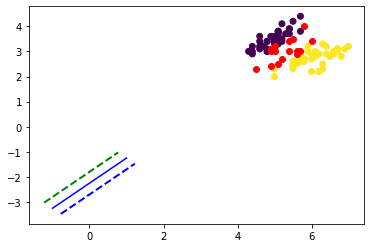

In [4]:
boolNp = []
appended = True;
count = 0
deleteIndex = []

for xCount in range(len(X)):
    for spptVectorCount in range(len(svc.support_vectors_)):
        if (np.array_equal(X[xCount], svc.support_vectors_[spptVectorCount])):
            boolNp.append(False)
            deleteIndex.append(xCount)
            appended = True
            break;
        appended = False
    if (appended == False):
        boolNp.append(True)

filteredX = X[boolNp]
filteredY = np.delete(y, deleteIndex)

plt.scatter(filteredX[:, 0], filteredX[:, 1], c = filteredY)

# Constructing a hyperplane using a formula
w = svc.coef_[0] # w consists of 2 elements
b = svc.intercept_[0] # b consist of 1 element
x_points = np.linspace(-1, 1) # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1] # getting corresponding y-points

# Plotting a blue hyperplane
plt.plot(x_points, y_points, color='blue')

plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], color = 'red')

# Step 2 (unit-vector):
w_hat = svc.coef_[0] / (np.sqrt(np.sum(svc.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Plot margin lines

# Blue margin line above
plt.plot(points_of_line_above[:, 0], points_of_line_above[:, 1], 'b--', linewidth=2)

# Green margin line below
plt.plot(points_of_line_below[:, 0], points_of_line_below[:, 1], 'g--', linewidth=2)